In [161]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm



In [162]:
import matplotlib.pyplot as plt

In [163]:

data = pd.read_csv('housestats.csv')



In [164]:

data.head()


,Taxi_dist,Market_dist,Hospital_dist,Carpet_area,Builtup_area,Parking_type,City_type,Rainfall,Price_house
0,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000


In [165]:
pd.set_option('display.max_columns', None)

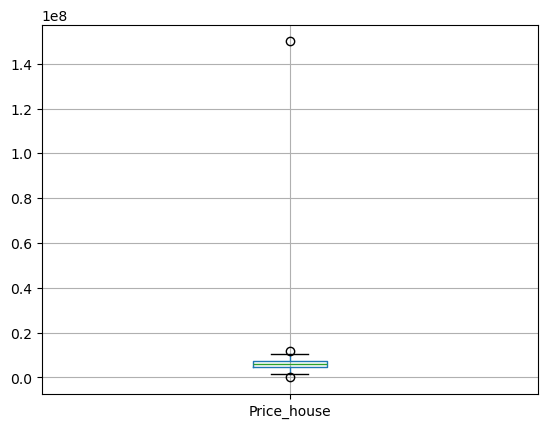

In [166]:
# boxplot to showoutliers
data.boxplot(column=["Price_house"])
plt.show()

In [167]:
def susnata(data,age):
 Q1 = data[age].quantile(0.25)
 Q3 = data[age].quantile(0.75)
 IQR = Q3 - Q1
 data= data.loc[~((data[age] < (Q1 - 1.5 * IQR)) | (data[age] > (Q3 + 1.5 * IQR))),]
 return data


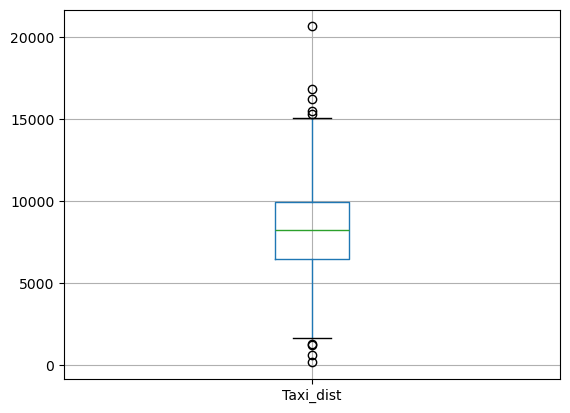

In [168]:
data.boxplot(column=["Taxi_dist"])
plt.show()

In [169]:
data=susnata(data,"Price_house")

In [170]:
data = susnata(data,"Taxi_dist")

In [171]:
data = susnata(data,"Carpet_area")

In [172]:
data = susnata(data,"Builtup_area")

In [173]:
data = susnata(data,"Rainfall")

In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 911 entries, 0 to 931
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Taxi_dist      899 non-null    float64
 1   Market_dist    899 non-null    float64
 2   Hospital_dist  911 non-null    float64
 3   Carpet_area    904 non-null    float64
 4   Builtup_area   898 non-null    float64
 5   Parking_type   911 non-null    object 
 6   City_type      911 non-null    object 
 7   Rainfall       911 non-null    int64  
 8   Price_house    911 non-null    int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 71.2+ KB


In [175]:

data.isnull().sum()


Taxi_dist        12
Market_dist      12
Hospital_dist     0
Carpet_area       7
Builtup_area     13
Parking_type      0
City_type         0
Rainfall          0
Price_house       0
dtype: int64

In [176]:
data = data.dropna()

In [177]:

data = pd.get_dummies(data=data,
columns=['Parking_type', 'City_type'],
drop_first=True)

In [178]:
data.head()

,Taxi_dist,Market_dist,Hospital_dist,Carpet_area,Builtup_area,Rainfall,Price_house,Parking_type_No Parking,Parking_type_Not Provided,Parking_type_Open,City_type_CAT B,City_type_CAT C
0,9796.0,5250.0,10703.0,1659.0,1961.0,530,6649000,False,False,True,True,False
1,8294.0,8186.0,12694.0,1461.0,1752.0,210,3982000,False,True,False,True,False
2,11001.0,14399.0,16991.0,1340.0,1609.0,720,5401000,False,True,False,False,False
3,8301.0,11188.0,12289.0,1451.0,1748.0,620,5373000,False,False,False,True,False
4,10510.0,12629.0,13921.0,1770.0,2111.0,450,4662000,False,True,False,True,False


In [179]:
#I am segregating categorical variables
cat = data.loc[:, [
    "Parking_type_No Parking",
    "Parking_type_Not Provided",
    "Parking_type_Open",
    "City_type_CAT B",
    "City_type_CAT C"
]]

In [180]:
cat.head()

,Parking_type_No Parking,Parking_type_Not Provided,Parking_type_Open,City_type_CAT B,City_type_CAT C
0,False,False,True,True,False
1,False,True,False,True,False
2,False,True,False,False,False
3,False,False,False,True,False
4,False,True,False,True,False


In [181]:
data = data.drop([
    "Parking_type_No Parking",
    "Parking_type_Not Provided",
    "Parking_type_Open",
    "City_type_CAT B",
    "City_type_CAT C"
],axis=1)


In [182]:
data.head()

,Taxi_dist,Market_dist,Hospital_dist,Carpet_area,Builtup_area,Rainfall,Price_house
0,9796.0,5250.0,10703.0,1659.0,1961.0,530,6649000
1,8294.0,8186.0,12694.0,1461.0,1752.0,210,3982000
2,11001.0,14399.0,16991.0,1340.0,1609.0,720,5401000
3,8301.0,11188.0,12289.0,1451.0,1748.0,620,5373000
4,10510.0,12629.0,13921.0,1770.0,2111.0,450,4662000


In [183]:
#concatnating the columns 
data = pd.concat([data,cat],axis=1)

In [184]:
data.head()

,Taxi_dist,Market_dist,Hospital_dist,Carpet_area,Builtup_area,Rainfall,Price_house,Parking_type_No Parking,Parking_type_Not Provided,Parking_type_Open,City_type_CAT B,City_type_CAT C
0,9796.0,5250.0,10703.0,1659.0,1961.0,530,6649000,False,False,True,True,False
1,8294.0,8186.0,12694.0,1461.0,1752.0,210,3982000,False,True,False,True,False
2,11001.0,14399.0,16991.0,1340.0,1609.0,720,5401000,False,True,False,False,False
3,8301.0,11188.0,12289.0,1451.0,1748.0,620,5373000,False,False,False,True,False
4,10510.0,12629.0,13921.0,1770.0,2111.0,450,4662000,False,True,False,True,False


In [185]:

rock=sm.ols(formula=
"Price_house~Taxi_dist+Market_dist+Hospital_dist+Carpet_area+Builtup_area + Rainfall+Q('City_type_CAT B')+Q('City_type_CAT C')+Q('Parking_type_No Parking')+Q('Parking_type_Not Provided')+Q('Parking_type_Open') ",
data=data).fit()

In [186]:
rock.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Price_house   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     78.31
Date:                Mon, 18 Aug 2025   Prob (F-statistic):          8.18e-122
Time:                        18:54:22   Log-Likelihood:                -13554.
No. Observations:                 879   AIC:                         2.713e+04
Df Residuals:                     867   BIC:                         2.719e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                               5.591e+06   3.75e+05     14.908      0.000    4.85e+06    6.33e+06
Q('City_type_CAT B')[T.True]           -1.857e+06    9.6e+04    -19.343      0.000   -2.05e+06   -1.67e+06
Q('City_type_CAT C')[T.True]           -2.856e+06   1.06e+05    -26.900      0.000   -3.06e+06   -2.65e+06
Q('Parking_type_No Parking')[T.True]   -6.572e+05   1.39e+05     -4.712      0.000   -9.31e+05   -3.83e+05
Q('Parking_type_Not Provided')[T.True] -5.002e+05   1.23e+05     -4.054      0.000   -7.42e+05   -2.58e+05
Q('Parking_type_Open')[T.True]         -2.816e+05   1.13e+05     -2.496      0.013   -5.03e+05   -6.02e+04
Taxi_dist                                 29.5284     27.128      1.088      0.277     -23.716      82.773
Market_dist                               11.3965     20.777      0.549      0.583     -29.383      52.176
Hospital_dist                             58.1930     30.056      1.936      0.053      -0.798     117.184
Carpet_area                              589.0032   3503.950      0.168      0.867   -6288.212    7466.219
Builtup_area                             146.3882   2924.742      0.050      0.960   -5594.014    5886.790
Rainfall                                -174.1455    156.946     -1.110      0.267    -482.183     133.892
==============================================================================
Omnibus:                        4.924   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                4.796
Skew:                           0.159   Prob(JB):                       0.0909
Kurtosis:                       3.173   Cond. No.                     1.80e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [187]:
#Prob (F-statistic)anova
#Linear Regression
# Anova (p value should be less than .05)
# H0: All coeff = 0
# H1 : At least one of the coeff is not = 0



In [188]:
# P value of independent variable (p value should be less than .05)
# H0: the coeff = 0
# H1 : the coeff not = 0

In [189]:
rock=sm.ols(formula=
"Price_house~Hospital_dist+Carpet_area + Q('City_type_CAT B')+Q('City_type_CAT C')+Q('Parking_type_No Parking')+Q('Parking_type_Not Provided')+Q('Parking_type_Open') ",
data=data).fit()
rock.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Price_house   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     122.9
Date:                Mon, 18 Aug 2025   Prob (F-statistic):          2.63e-125
Time:                        18:54:22   Log-Likelihood:                -13556.
No. Observations:                 879   AIC:                         2.713e+04
Df Residuals:                     871   BIC:                         2.717e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                               5.436e+06   3.44e+05     15.810      0.000    4.76e+06    6.11e+06
Q('City_type_CAT B')[T.True]           -1.857e+06   9.56e+04    -19.424      0.000   -2.04e+06   -1.67e+06
Q('City_type_CAT C')[T.True]           -2.851e+06   1.06e+05    -26.912      0.000   -3.06e+06   -2.64e+06
Q('Parking_type_No Parking')[T.True]   -6.491e+05   1.39e+05     -4.666      0.000   -9.22e+05   -3.76e+05
Q('Parking_type_Not Provided')[T.True] -4.916e+05   1.23e+05     -3.994      0.000   -7.33e+05    -2.5e+05
Q('Parking_type_Open')[T.True]           -2.8e+05   1.13e+05     -2.485      0.013   -5.01e+05   -5.88e+04
Hospital_dist                             86.7472     16.520      5.251      0.000      54.324     119.170
Carpet_area                              769.4710    168.996      4.553      0.000     437.783    1101.159
==============================================================================
Omnibus:                        5.544   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                5.416
Skew:                           0.173   Prob(JB):                       0.0667
Kurtosis:                       3.168   Cond. No.                     1.14e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [190]:
rock=sm.ols(formula=
"Price_house~Hospital_dist+Carpet_area + Q('City_type_CAT B')+Q('City_type_CAT C')+Q('Parking_type_No Parking')+Q('Parking_type_Not Provided')+Q('Parking_type_Open') ",
data=data).fit()

In [191]:
rock.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Price_house   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     122.9
Date:                Mon, 18 Aug 2025   Prob (F-statistic):          2.63e-125
Time:                        18:54:22   Log-Likelihood:                -13556.
No. Observations:                 879   AIC:                         2.713e+04
Df Residuals:                     871   BIC:                         2.717e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                               5.436e+06   3.44e+05     15.810      0.000    4.76e+06    6.11e+06
Q('City_type_CAT B')[T.True]           -1.857e+06   9.56e+04    -19.424      0.000   -2.04e+06   -1.67e+06
Q('City_type_CAT C')[T.True]           -2.851e+06   1.06e+05    -26.912      0.000   -3.06e+06   -2.64e+06
Q('Parking_type_No Parking')[T.True]   -6.491e+05   1.39e+05     -4.666      0.000   -9.22e+05   -3.76e+05
Q('Parking_type_Not Provided')[T.True] -4.916e+05   1.23e+05     -3.994      0.000   -7.33e+05    -2.5e+05
Q('Parking_type_Open')[T.True]           -2.8e+05   1.13e+05     -2.485      0.013   -5.01e+05   -5.88e+04
Hospital_dist                             86.7472     16.520      5.251      0.000      54.324     119.170
Carpet_area                              769.4710    168.996      4.553      0.000     437.783    1101.159
==============================================================================
Omnibus:                        5.544   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                5.416
Skew:                           0.173   Prob(JB):                       0.0667
Kurtosis:                       3.168   Cond. No.                     1.14e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

data["pred"] = rock.predict()


In [193]:
data.head()

,Taxi_dist,Market_dist,Hospital_dist,Carpet_area,Builtup_area,Rainfall,Price_house,Parking_type_No Parking,Parking_type_Not Provided,Parking_type_Open,City_type_CAT B,City_type_CAT C,pred
0,9796.0,5250.0,10703.0,1659.0,1961.0,530,6649000,False,False,True,True,False,5.504408e+06
1,8294.0,8186.0,12694.0,1461.0,1752.0,210,3982000,False,True,False,True,False,5.313141e+06
2,11001.0,14399.0,16991.0,1340.0,1609.0,720,5401000,False,True,False,False,False,7.449713e+06
3,8301.0,11188.0,12289.0,1451.0,1748.0,620,5373000,False,False,False,True,False,5.761921e+06
4,10510.0,12629.0,13921.0,1770.0,2111.0,450,4662000,False,True,False,True,False,5.657346e+06


In [194]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [195]:
variables = rock.model.exog

In [196]:
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif 
var["vif"] = vif
var

,0,vif
Intercept,0.000,70.787739
Q('City_type_CAT B')[T.True],0.000,1.299245
Q('City_type_CAT C')[T.True],0.000,1.287127
Q('Parking_type_No Parking')[T.True],0.000,1.515305
Q('Parking_type_Not Provided')[T.True],0.000,1.707268
Q('Parking_type_Open')[T.True],0.013,1.814696
Hospital_dist,0.000,1.014751
Carpet_area,0.000,1.009040


In [197]:
#new_df = data[['Price_house', 'pred']].copy()



In [199]:
data["mp"] = abs((data["Price_house"] - data["pred"])/data["Price_house"])
(data.mp.mean())*100#mape

18.58300674681698

In [ ]:
# assumption of  normality test
#Shapiro Wilkson  test
#Null Hypothesis: The residuals are normally distributed.
#Alternative Hypothesis: The residuals are not normally distributed.
from scipy import stats
stats.shapiro(rock.resid)#2nd value is p value;

In [200]:
from scipy import stats
stats.shapiro(rock.resid)# The 2nd value is p value

ShapiroResult(statistic=0.9974416883518403, pvalue=0.18693562370295458)

In [201]:
#Checking for autocorrelation
#Null Hypothesis: Autocorrelation is absent.
#Alternative Hypothesis: Autocorrelation is present.

from statsmodels.stats import diagnostic as diag
#2nd value is p value

In [202]:
diag.acorr_ljungbox(rock.resid , lags = 1)#

,lb_stat,lb_pvalue
1,2.168435,0.14087


In [ ]:
#Checking heteroscedasticity
#Null Hypothesis: Error terms are homoscedastic
#Alternative Hypothesis: Error terms are heteroscedastic.


In [203]:

import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [204]:

#Goldfeld-Quandt test
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(rock.resid, rock.model.exog)
lzip(name, test)#2nd value is p value

[('F statistic', 1.0577509092240602), ('p-value', 0.28001263425553247)]

In [205]:

#Breush-Pagan test:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(rock.resid, rock.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 4.923867364448963),
 ('p-value', 0.6692536679728269),
 ('f-value', 0.700934116819778),
 ('f p-value', 0.6713363750950806)]

In [206]:
data.to_csv('pred_houseprice.csv',index=False)